In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [7]:
df = pd.read_csv('./Customer_Data.csv', sep=';', encoding='ISO-8859-1')
df.head(2)

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.44252,3727.113162,15708.23968,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.74244,18733.810960,38284.35443,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9


## Comparación con el diccionario de datos

Las siguientes columnas son todas númericas a excepción de ID, el cual es una cadena de caracteres. Además, se verifica que correspondan las columnas en el diccionario de datos y en el conjunto de datos.

In [8]:
df.dtypes

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object

# Perfilamiento

Primero que todo hagamos el análisis de las columnas en base a su distribución. En cuanto a las distribuciones se nota lo siguiente:

| Columna | Estadisticas |
| - | - |
| SALDO | Una distribución bimodal. Una parte de los datos se agrupan por debajo de 100000 y otros por encima de este límite. |
| F_SALDO | Una distribución bimodal. Una parte de los datos se encuentra por debajo de 0.4 y otra parte de los mismos por encima de este número |
| COMPRAS | Una distribución multimodal. Tenemos tres picos pronunciados, uno de ellos en 80000, otro cerca de 270000 y el ultimo por 420000. | 
| COMPRAS_PUNTUALES | Una distribución bimodal. Los datos se agrupan por debajo o por encima de 20000. |
| COMPRAS_PLAZOS | Una distribución multimodal. Los datos se agrupan en 3 grupos marcados. Por debajo de 8000, por encima de 8000 y debajo de 15000, y el último grupo por encima de 15000. | 
| AVANCE_EFECTIVO | Una distribución mas que todo bimodal. Se agrupan los registros por debajo y arriba de 30000. |
| F_COMPRAS | |
| F_COMPRAS_PUNTUALES | |
| F_COMPRAS_PLAZOS | |
| F_AVANCE_EFECTIVO | |
| P_AVANCE_EFECTIVO | |
| P_COMPRAS | | 
| LIMITE_CREDITO | |
| PAGOS | | 
| PAGOS_MINIMOS | |
| F_PAGOS_COMPLETOS | |

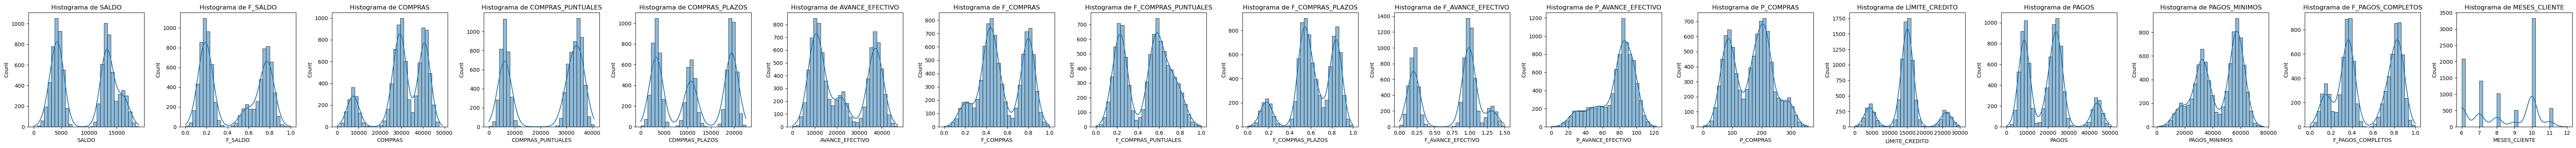

In [70]:
number_cols = df.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

Sobre las estadisticas descriptivas de cada una de las columnas se nota lo siguiente:

In [72]:
df[[col for col in number_cols if 'F_' not in col]].describe()

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000
mean,9382.387900,30525.873439,22913.665720,11407.851805,22573.474202,76.169162,164.981453,14696.640361,19824.347218,44222.977795,8.370615
std,5118.113559,11041.410943,13573.919086,7087.102996,12594.295895,22.260935,71.322003,5537.074673,11069.268177,15468.314241,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,6.000000
25%,4275.036859,27106.651598,6698.252490,3736.720194,10944.431108,65.000000,97.000000,13487.727310,9329.603116,31572.127680,7.000000
50%,12007.718810,30934.582275,31011.033490,10832.141085,19465.792260,82.000000,176.000000,14942.545350,21367.621275,48780.271750,8.000000
75%,13740.565878,39825.160795,34495.416422,19127.083038,36150.722568,92.000000,216.000000,16269.727120,25219.127372,57761.175980,10.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,47137.211760,123.000000,358.000000,30000.000000,50721.483360,76406.207520,12.000000


In [73]:
df[[col for col in number_cols if 'F_' in col]].describe()

,F_SALDO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.459205,0.559810,0.478032,0.623916,0.734946,0.545414
std,0.282998,0.214055,0.221873,0.208207,0.422563,0.267443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.188490,0.407273,0.250856,0.518231,0.230716,0.336732
50%,0.306650,0.505305,0.533521,0.607608,0.947651,0.432690
75%,0.756061,0.777084,0.649120,0.814929,1.029172,0.815178
max,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000


# Calidad de datos

## Completitud

In [82]:
df.isna().sum()

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

In [94]:
sim = SimpleImputer(strategy='mean')
df['LÍMITE_CREDITO'] = sim.fit_transform(df[['LÍMITE_CREDITO']])

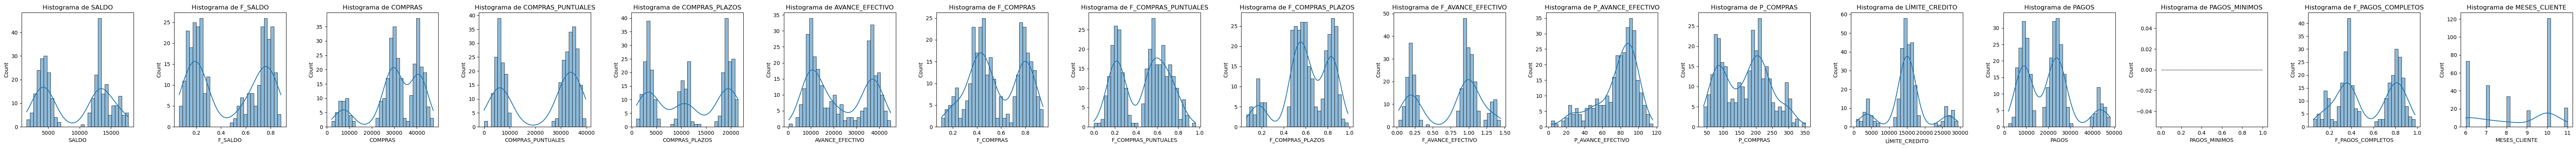

In [100]:
complt = df[df['PAGOS_MINIMOS'].isna()].copy()

number_cols = complt.select_dtypes(include = ['int64','float']).columns
num_cols = len(number_cols)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(4 * num_cols, 4))

# Graficar histogramas para cada columna numérica
for ax, col in zip(axes, number_cols):
    sns.histplot(complt[col], bins=30, kde=True, ax=ax)
    ax.set_title(f'Histograma de {col}')

plt.tight_layout()
plt.show()

In [93]:
df.isna().sum()

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           0
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

## Unicidad

In [77]:
df[df.duplicated()].shape[0]

0

## Consistencia

## Validez

# Transformaciones

# Entrenamiento primer modelo